## Data Prerocessing

In [1]:
import numpy as np
import tensorflow as tf
import datetime
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path_custom = os.listdir('C:/Users/ASUS/Desktop/HPS/Splited_Datasets/train_data/custom')
print (dataset_path_custom)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path_custom))


['0_background', '1_trash', '2_paper', '3_plastic', '4_metal', '5_electronic_invoice', '6_bubble_wrap', '7_thin_plastic_bag', '8_fruit_mesh_bag', '9_thin_film_paper_cup']
Types of classes labels found:  10


In [2]:
class_labels = []

for item in dataset_path_custom:
 # Get all the file names
 all_classes = os.listdir('C:/Users/ASUS/Desktop/HPS/Splited_Datasets/train_data/custom' + '/' +item)
 #print(all_classes)

 # Add them to the list
 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))
    #print(class_labels[:5])

In [3]:

# Build a dataframe        
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

         Labels                                    image
0  0_background  dataset_path/0_background/00000 (2).png
1  0_background      dataset_path/0_background/00000.png
2  0_background  dataset_path/0_background/00001 (2).png
3  0_background      dataset_path/0_background/00001.png
4  0_background  dataset_path/0_background/00002 (2).png
                     Labels                                         image
3457  9_thin_film_paper_cup  dataset_path/9_thin_film_paper_cup/00149.png
3458  9_thin_film_paper_cup  dataset_path/9_thin_film_paper_cup/00152.png
3459  9_thin_film_paper_cup  dataset_path/9_thin_film_paper_cup/00153.png
3460  9_thin_film_paper_cup  dataset_path/9_thin_film_paper_cup/00154.png
3461  9_thin_film_paper_cup  dataset_path/9_thin_film_paper_cup/00155.png


In [4]:
# Let's check how many samples for each category are present
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  3462
Labels
1_trash                  565
2_paper                  550
4_metal                  531
3_plastic                400
5_electronic_invoice     314
6_bubble_wrap            288
9_thin_film_paper_cup    274
7_thin_plastic_bag       245
8_fruit_mesh_bag         156
0_background             139
Name: count, dtype: int64


In [5]:
import cv2
path = 'C:/Users/ASUS/Desktop/HPS/Splited_Datasets/train_data/custom'
dataset_path = os.listdir('C:/Users/ASUS/Desktop/HPS/Splited_Datasets/train_data/custom')

im_size = 224

images = []
labels = []

for i in dataset_path_custom:
    data_path = 'C:/Users/ASUS/Desktop/HPS/Splited_Datasets/train_data/custom' + '/' + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)



In [6]:

#This model takes input images of shape (224, 224, 3), and the input data should range [0, 255]. 

images = np.array(images)

images = images.astype('float32') / 255.0
images.shape

(3462, 224, 224, 3)

In [7]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)
sorted_indices = np.argsort([s[0] for s in y])
y = y[sorted_indices]

print(type(y))

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

['0_background' '0_background' '0_background' ... '9_thin_film_paper_cup'
 '9_thin_film_paper_cup' '9_thin_film_paper_cup']
<class 'numpy.ndarray'>
[0 0 0 ... 9 9 9]


In [8]:

y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y).toarray()
print(Y[:5])
print(Y[35:])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [9]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)



(3288, 224, 224, 3)
(3288, 10)
(174, 224, 224, 3)
(174, 10)



# EfficientNet Implementation :



In [10]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0

NUM_CLASSES = 10
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)


inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))


# Using model without transfer learning

outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest"
)

print(train_datagen.__dict__)
train_generator = train_datagen.flow(train_x, train_y, batch_size=16)



{'featurewise_center': False, 'samplewise_center': False, 'featurewise_std_normalization': False, 'samplewise_std_normalization': False, 'zca_whitening': False, 'zca_epsilon': 1e-06, 'rotation_range': 10, 'width_shift_range': 0.05, 'height_shift_range': 0.05, 'shear_range': 0.1, 'zoom_range': [0.9, 1.1], 'channel_shift_range': 0.0, 'fill_mode': 'nearest', 'cval': 0.0, 'horizontal_flip': True, 'vertical_flip': False, 'rescale': None, 'preprocessing_function': None, 'dtype': 'float32', 'interpolation_order': 1, 'data_format': 'channels_last', 'channel_axis': 3, 'row_axis': 1, 'col_axis': 2, '_validation_split': 0.0, 'mean': None, 'std': None, 'zca_whitening_matrix': None, 'brightness_range': None}


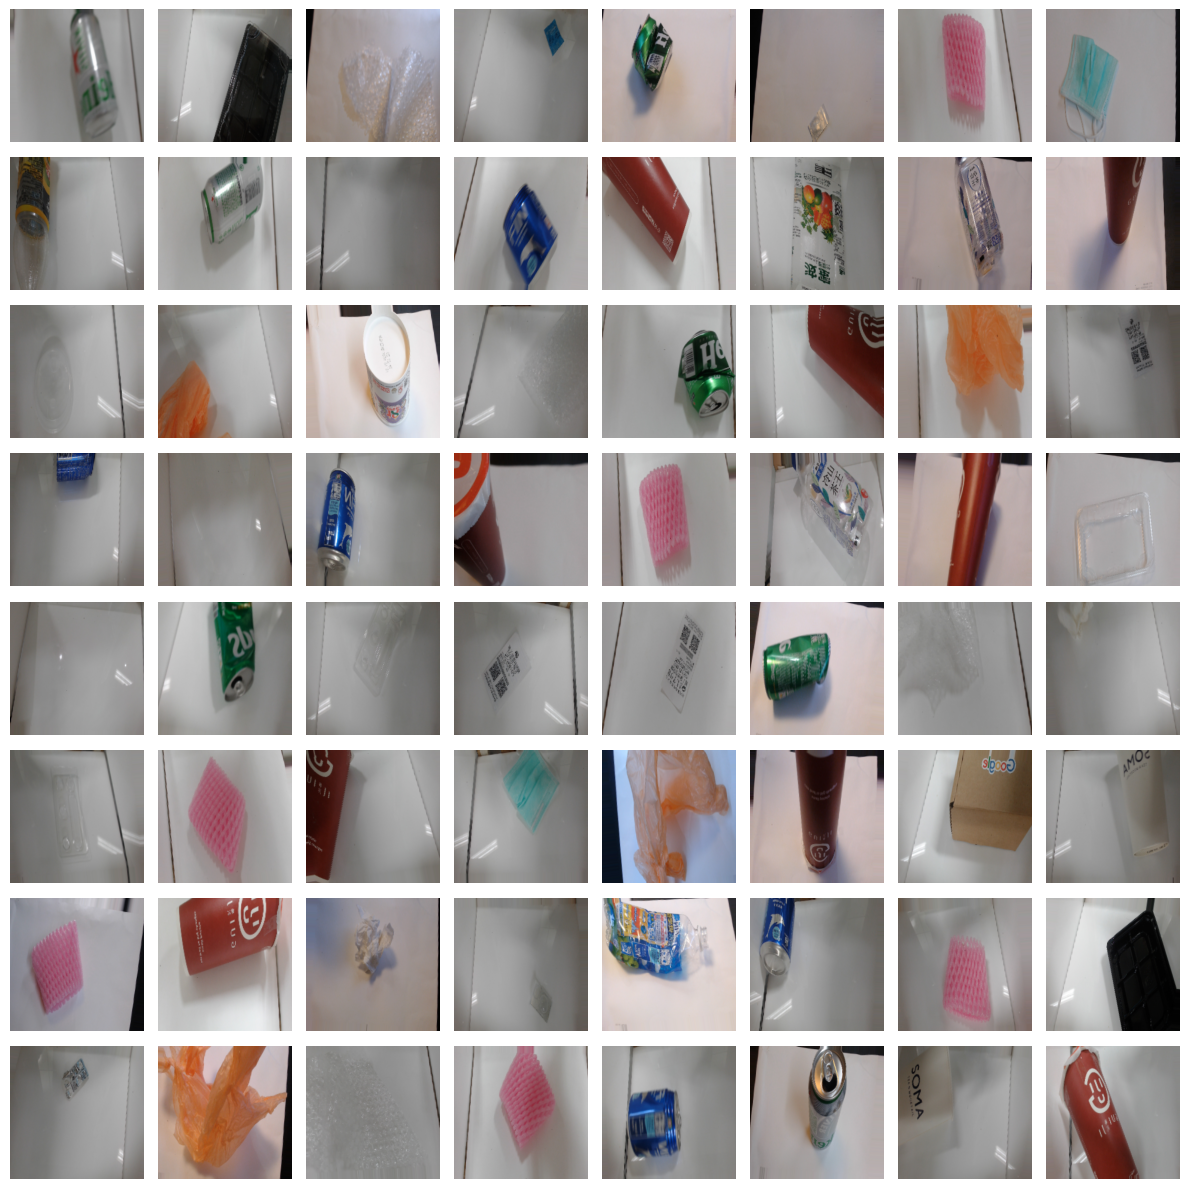

In [12]:
i = 0
num_subplots = 64  # Number of subplots you want to display
num_cols = 8  # Number of columns in the subplot grid
num_rows = (num_subplots + num_cols - 1) // num_cols  # Calculate the number of rows

fig = plt.figure(figsize=(12, 12))

for batch in train_generator:
    bgr_image = batch[0][0][:, :, ::-1]
    
    ax = fig.add_subplot(num_rows, num_cols, i + 1)
    ax.imshow(bgr_image)
    ax.axis('off')
    
    i += 1
    if i >= num_subplots:
        break

plt.tight_layout()
plt.show()

In [13]:
model = tf.keras.Model(inputs, outputs)

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0006)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"] )

model.summary()

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

hist = model.fit(train_generator, epochs=40, verbose=2,validation_data=(test_x, test_y), callbacks=[tensorboard_callback])

model.save("V9_40ep_custom_aug.h5")


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, 10)                4062381   
 )                                                               
                                                                 
Total params: 4062381 (15.50 MB)
Trainable params: 4020358 (15.34 MB)
Non-trainable params: 42023 (164.16 KB)
_________________________________________________________________


Epoch 1/40
206/206 - 399s - loss: 2.6435 - accuracy: 0.2895 - val_loss: 3.9953 - val_accuracy: 0.0575 - 399s/epoch - 2s/step
Epoch 2/40
206/206 - 536s - loss: 1.5182 - accuracy: 0.4811 - val_loss: 3.9081 - val_accuracy: 0.2184 - 536s/epoch - 3s/step
Epoch 3/40
206/206 - 703s - loss: 1.2181 - accuracy: 0.5663 - val_loss: 3.2558 - val_accuracy: 0.1149 - 703s/epoch - 3s/step
Epoch 4/40
206/206 - 679s - loss: 1.0697 - accuracy: 0.6372 - val_loss: 1.3752 - val_accuracy: 0.4540 - 679s/epoch - 3s/step
Epoch 5/40
206/206 - 654s - loss: 0.8078 - accuracy: 0.7269 - val_loss: 0.7488 - val_accuracy: 0.7241 - 654s/epoch - 3s/step
Epoch 6/40
206/206 - 686s - loss: 0.7397 - accuracy: 0.7549 - val_loss: 1.2812 - val_accuracy: 0.5690 - 686s/epoch - 3s/step
Epoch 7/40
206/206 - 695s - loss: 0.5826 - accuracy: 0.8026 - val_loss: 1.2054 - val_accuracy: 0.6609 - 695s/epoch - 3s/step
Epoch 8/40
206/206 - 685s - loss: 0.5692 - accuracy: 0.8114 - val_loss: 0.6434 - val_accuracy: 0.7759 - 685s/epoch - 3s/step


c:\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


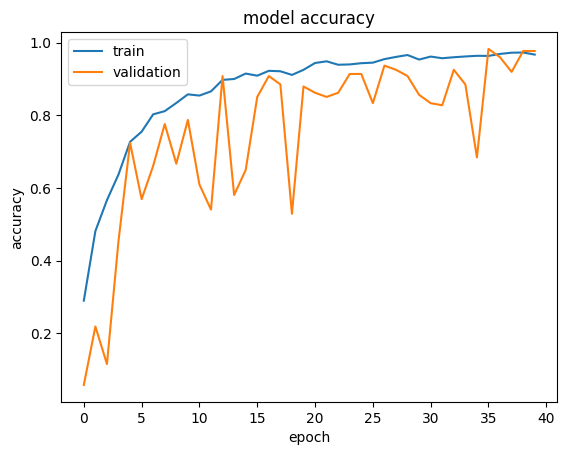

In [14]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

In [15]:
# from tensorflow import keras
# model = keras.models.load_model("model_0811.h5")

preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

6/6 [==============================] - 5s 809ms/step - loss: 0.0874 - accuracy: 0.9770
Loss = 0.08741464465856552
Test Accuracy = 0.977011501789093


# Testing Efficient Model On Unseen data

Input image shape: (1, 224, 224, 3)


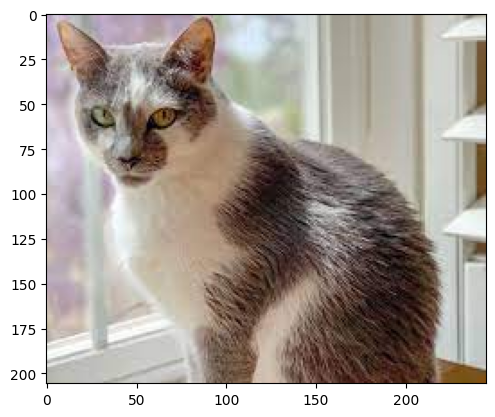

In [16]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input


img_path = 'C:\\Users\\ASUS\\Desktop\\HPS\\EfficientNet\\predict_sample\\unseen_imagenet.jpg'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [17]:
preds=model.predict(x)
preds     # probabilities for being in each of the 3 classes

1/1 [==============================] - 2s 2s/step


array([[0.000000e+00, 0.000000e+00, 0.000000e+00, 8.523264e-30,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00]], dtype=float32)

In [18]:

# Cuda and cudnn is installed for this tensorflow version. So we can see GPU is enabled
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [19]:
# %%timeit -n1 -r1 
# with tf.device('/CPU:0'):
#     cpu_performance =model.fit(train_x, train_y, epochs=30, verbose=2)
#     cpu_performance

In [20]:

# %%timeit -n1 -r1 
# with tf.device('/GPU:0'):
#     gpu_performance =model.fit(train_x, train_y, epochs=30, verbose=2)
#     gpu_performance

In [21]:
# CPU completed the training in 7 min 53 Seconds and GPU did that training in 25.6 seconds